In [ ]:
!pip install PySastrawi

     |████████████████████████████████| 215kB 4.9MB/s 


In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam, Adamax, SGD
from sklearn.model_selection import train_test_split
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('data.csv', encoding='latin-1')
alay_dict = pd.read_csv('new_kamusalay.csv', encoding='latin-1')
id_stopword_dict = pd.read_csv('stopwordbahasa.csv', header=None)

In [ ]:
alay_dict = alay_dict.rename(columns={'anakjakartaasikasik':'tidak baku', 'anak jakarta asyik asyik':'baku'})
id_stopword_dict = id_stopword_dict.rename(columns={0:'stopword'})

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def lowercase(text):
    return text.lower()

def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) 
    return text

alay_dict_map = dict(zip(alay_dict['tidak baku'], alay_dict['baku']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def stemming(text):
    return stemmer.stem(text)

In [ ]:
def preprocess(text):
    text = lowercase(text)
    text = remove_nonaplhanumeric(text)
    text = remove_unnecessary_char(text)
    text = normalize_alay(text)
    text = stemming(text)
    text = remove_stopword(text)
    return text

In [ ]:
data['Tweet'] = data['Tweet'].apply(preprocess)

In [ ]:
data.columns.values

array(['Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group',
       'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other',
       'HS_Weak', 'HS_Moderate', 'HS_Strong'], dtype=object)

In [ ]:
data.shape

(13169, 13)

In [ ]:
data.Tweet.str.len().max()

453

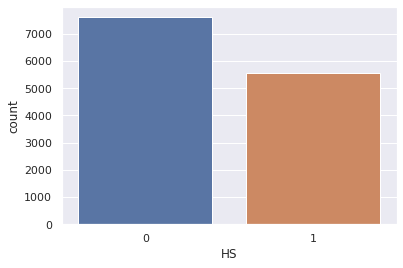

In [ ]:
sns.countplot(x='HS', data=data)

In [ ]:
data.Tweet[data['Abusive'] == 1].count()

5043

In [ ]:
data.Tweet[data['HS'] == 1].count()

5561

In [ ]:
individual = data.Tweet[data['HS_Individual'] == 1].count()
group = data.Tweet[data['HS_Group'] == 1].count()
religion = data.Tweet[data['HS_Religion'] == 1].count()
race = data.Tweet[data['HS_Race'] == 1].count()
physical = data.Tweet[data['HS_Physical'] == 1].count()
gender = data.Tweet[data['HS_Gender'] == 1].count()
other = data.Tweet[data['HS_Other'] == 1].count()

In [ ]:
print(pd.DataFrame({
    'Kategori':['Individu', 'Kelompok', 'Agama', 'Ras', 'Fisik', 'Gender', 'Lain-lain'],
    'Jumlah':[individual, group, religion, race, physical, gender, other],
    'Presentase':[individual/131.69, group/131.69, religion/131.69, race/131.69, physical/131.69, gender/131.69, other/131.69]
}))

    Kategori  Jumlah  Presentase
0   Individu    3575   27.147088
1   Kelompok    1986   15.080872
2      Agama     793    6.021718
3        Ras     566    4.297973
4      Fisik     323    2.452730
5     Gender     306    2.323639
6  Lain-lain    3740   28.400030


In [ ]:
jumlah_kata_max = max(data['Tweet'].apply(lambda x: len(str(x).split())))
jumlah_kata_max

106

In [ ]:
raw_words = data['Tweet'].values
raw_words = raw_words.tolist()
raw_string = ' '.join(raw_words)
wordList = re.sub("[^\w]", " ",  raw_string).split()
result = list(filter(lambda x: (len(x) > 3), wordList))
result2 = ' '.join(result)

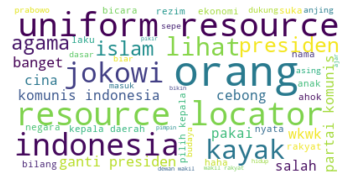

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=50,
                      background_color='white').generate(result2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

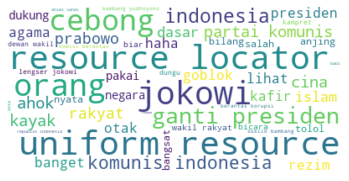

In [ ]:
raw_words = data.Tweet[data['HS'] == 1].values
raw_words = raw_words.tolist()
raw_string = ' '.join(raw_words)
wordList = re.sub("[^\w]", " ",  raw_string).split()
result = list(filter(lambda x: (len(x) > 3), wordList))
result2 = ' '.join(result)

wordcloud = WordCloud(max_font_size=50, max_words=50,
                      background_color='white').generate(result2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

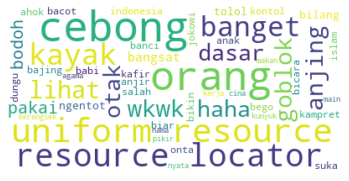

In [ ]:
raw_words = data.Tweet[data['Abusive'] == 1].values
raw_words = raw_words.tolist()
raw_string = ' '.join(raw_words)
wordList = re.sub("[^\w]", " ",  raw_string).split()
result = list(filter(lambda x: (len(x) > 3), wordList))
result2 = ' '.join(result)

wordcloud = WordCloud(max_font_size=50, max_words=50,
                      background_color='white').generate(result2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

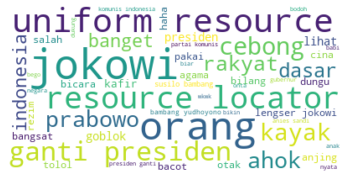

In [ ]:
raw_words = data.Tweet[data['HS_Individual'] == 1].values
raw_words = raw_words.tolist()
raw_string = ' '.join(raw_words)
wordList = re.sub("[^\w]", " ",  raw_string).split()
result = list(filter(lambda x: (len(x) > 3), wordList))
result2 = ' '.join(result)

wordcloud = WordCloud(max_font_size=50, max_words=50,
                      background_color='white').generate(result2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

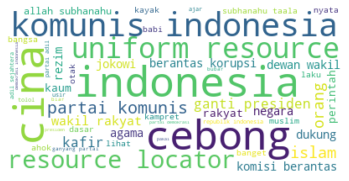

In [ ]:
raw_words = data.Tweet[data['HS_Group'] == 1].values
raw_words = raw_words.tolist()
raw_string = ' '.join(raw_words)
wordList = re.sub("[^\w]", " ",  raw_string).split()
result = list(filter(lambda x: (len(x) > 3), wordList))
result2 = ' '.join(result)

wordcloud = WordCloud(max_font_size=50, max_words=50,
                      background_color='white').generate(result2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

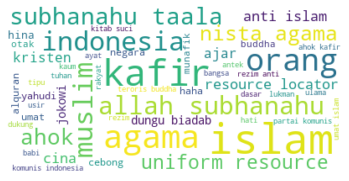

In [ ]:
raw_words = data.Tweet[data['HS_Religion'] == 1].values
raw_words = raw_words.tolist()
raw_string = ' '.join(raw_words)
wordList = re.sub("[^\w]", " ",  raw_string).split()
result = list(filter(lambda x: (len(x) > 3), wordList))
result2 = ' '.join(result)

wordcloud = WordCloud(max_font_size=50, max_words=50,
                      background_color='white').generate(result2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

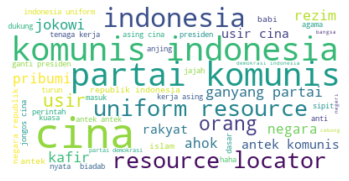

In [ ]:
raw_words = data.Tweet[data['HS_Race'] == 1].values
raw_words = raw_words.tolist()
raw_string = ' '.join(raw_words)
wordList = re.sub("[^\w]", " ",  raw_string).split()
result = list(filter(lambda x: (len(x) > 3), wordList))
result2 = ' '.join(result)

wordcloud = WordCloud(max_font_size=50, max_words=50,
                      background_color='white').generate(result2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

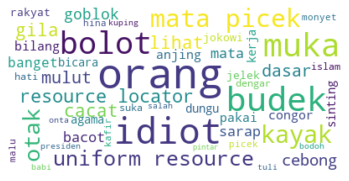

In [ ]:
raw_words = data.Tweet[data['HS_Physical'] == 1].values
raw_words = raw_words.tolist()
raw_string = ' '.join(raw_words)
wordList = re.sub("[^\w]", " ",  raw_string).split()
result = list(filter(lambda x: (len(x) > 3), wordList))
result2 = ' '.join(result)

wordcloud = WordCloud(max_font_size=50, max_words=50,
                      background_color='white').generate(result2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

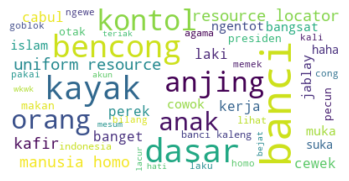

In [ ]:
raw_words = data.Tweet[data['HS_Gender'] == 1].values
raw_words = raw_words.tolist()
raw_string = ' '.join(raw_words)
wordList = re.sub("[^\w]", " ",  raw_string).split()
result = list(filter(lambda x: (len(x) > 3), wordList))
result2 = ' '.join(result)

wordcloud = WordCloud(max_font_size=50, max_words=50,
                      background_color='white').generate(result2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
df = data[['Tweet', 'HS']]
df = df.dropna()
df.head()

,Tweet,HS
0,cowok usaha lacak perhati gue lantas remeh per...,1
1,telat tau edan sarap gue gaul cigax jifla cal ...,0
2,41 kadang pikir percaya tuhan jatuh kali kali ...,0
3,ku tau mata sipit lihat,0
4,kaum cebong kafir lihat dongok dungu haha,1


In [ ]:
tweet = df['Tweet'].values
label = df[['HS']].values

In [ ]:
category = pd.get_dummies(df['HS'])
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='HS')
df_baru = df_baru.rename(columns={0:'Not hate speech', 1:'Hate speech'})
df_baru.head()

,Tweet,Not hate speech,Hate speech
0,cowok usaha lacak perhati gue lantas remeh per...,0,1
1,telat tau edan sarap gue gaul cigax jifla cal ...,1,0
2,41 kadang pikir percaya tuhan jatuh kali kali ...,1,0
3,ku tau mata sipit lihat,1,0
4,kaum cebong kafir lihat dongok dungu haha,0,1


In [ ]:
tweet_train, tweet_test, label_train, label_test = train_test_split(tweet, label, test_size=0.2)

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(tweet_train) 

sekuens_latih = tokenizer.texts_to_sequences(tweet_train)
sekuens_test = tokenizer.texts_to_sequences(tweet_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.85):
          self.model.stop_training = True
callbacks = myCallback()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adamax(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
history = model.fit(padded_latih, label_train, epochs=100, 
                    validation_data=(padded_test, label_test), verbose=1, callbacks=[callbacks])

Epoch 1/100
330/330 [==============================] - 15s 46ms/step - loss: 0.6253 - accuracy: 0.6406 - val_loss: 0.5355 - val_accuracy: 0.7494
Epoch 2/100
330/330 [==============================] - 14s 44ms/step - loss: 0.4493 - accuracy: 0.7925 - val_loss: 0.4388 - val_accuracy: 0.7931
Epoch 3/100
330/330 [==============================] - 15s 45ms/step - loss: 0.3864 - accuracy: 0.8295 - val_loss: 0.4063 - val_accuracy: 0.8162
Epoch 4/100
330/330 [==============================] - 14s 43ms/step - loss: 0.3509 - accuracy: 0.8480 - val_loss: 0.3963 - val_accuracy: 0.8265
Epoch 5/100
330/330 [==============================] - 14s 43ms/step - loss: 0.3265 - accuracy: 0.8615 - val_loss: 0.3944 - val_accuracy: 0.8318


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          80000     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 128)               41472     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 146,305
Trainable params: 146,305
Non-trainable params: 0
_________________________________________________________________


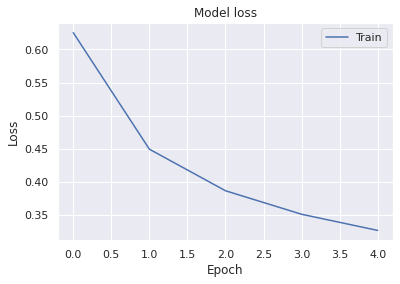

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

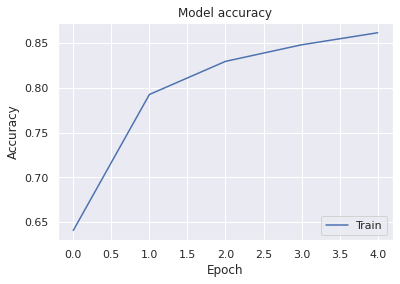

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()